## Car Evaluation Database

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). This model evaluates cars into four classifiers(unaccountable, accountable, good, very good)  according to the following attributes(buying, maintenance, doors, persons, luggage, safety).

Importing libraries(numpy, pandas, matplotlib, seaborn) and loading the car data into df variable

In [31]:
# Importing the libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

# Reading Dataset
df = pd.read_csv("car.data",sep=',',header=None, names=['buying','maintenance','doors','persons','luggage','safety','carClass'])


Diplaying the top 5 tuples of car data set using head function

In [32]:
df.head()

,buying,maintenance,doors,persons,luggage,safety,carClass
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Decribing the entire data set using describe function 

In [33]:
df.describe()

,buying,maintenance,doors,persons,luggage,safety,carClass
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1210


From the table we can understand that the dataset has following properties:<br /> 
-> The data set does not have missing values as all the attributes has the same no of tuples(from count). <br /> 
-> The unique value gives the no of distinct values available for each category.<br /> 
-> The top value gives the category values which appears maximum no of times.<br /> 
-> The freq value gives the frequency of the top category value<br /> 


There are some text values in our data set,replacing them by numeric values would be handy in visualising the data.

In [34]:
# Converting text values to numeric values

df['buying'] = df.buying.map({'vhigh':3,'high':2,'med':1,'low':0})
df['maintenance'] = df.maintenance.map({'vhigh':3,'high':2,'med':1,'low':0})
df['doors'] = df.doors.map({'2':2,'3':3,'4':4,'5more':5})
df['persons'] = df.persons.map({'2':2,'4':4,'more':5})
df['luggage'] = df.luggage.map({'small':0,'med':1,'big':2})
df['safety'] = df.safety.map({'low':0,'med':1,'high':2})
df['carClass'] = df.carClass.map({'unacc':0,'acc':1,'good':2,'vgood':3})

Displaying the top 5 tuples after mapping to numeric values.

In [35]:
df.head()

,buying,maintenance,doors,persons,luggage,safety,carClass
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


# Exploring the Data Set

Plotting bar graphs for all the six attributes in the data set.<br />
We use the subplots method of mathplotlib to represent the different graphs in a figure.
Later show method of matplotlib library is used to display the graphs.

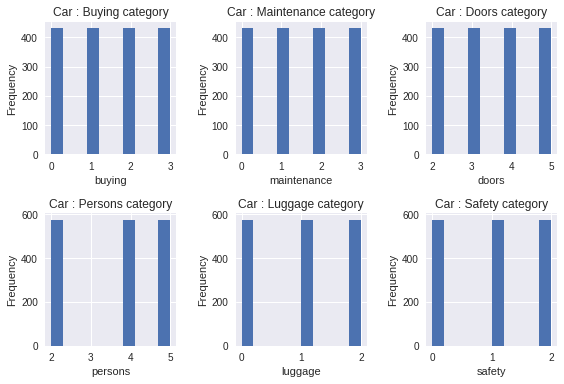

In [36]:

# np.random.seed(0)

n_bins = 10

fig,axes = plt.subplots(nrows=2, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()

colors = ['red', 'tan', 'lime']

ax0.hist(df['buying'], n_bins, histtype='bar')
ax0.set_title('Car : Buying category')
ax0.set_xlabel('buying')
ax0.set_ylabel('Frequency')

ax1.hist(df['maintenance'], n_bins, histtype='bar')
ax1.set_title('Car : Maintenance category')
ax1.set_xlabel('maintenance')
ax1.set_ylabel('Frequency')

ax2.hist(df['doors'], n_bins, histtype='bar',)
ax2.set_title('Car : Doors category')
ax2.set_xlabel('doors')
ax2.set_ylabel('Frequency')

ax3.hist(df['persons'], n_bins, histtype='bar')
ax3.set_title('Car : Persons category')
ax3.set_xlabel('persons')
ax3.set_ylabel('Frequency')

ax4.hist(df['luggage'], n_bins, histtype='bar')
ax4.set_title('Car : Luggage category')
ax4.set_xlabel('luggage')
ax4.set_ylabel('Frequency')

ax5.hist(df['safety'], n_bins, histtype='bar')
ax5.set_title('Car : Safety category')
ax5.set_xlabel('safety')
ax5.set_ylabel('Frequency')

fig.tight_layout()
plt.show()

We see that all the values in categories of each attribute are evenly distributed.

Plotting histogram for car class to know the class distribution

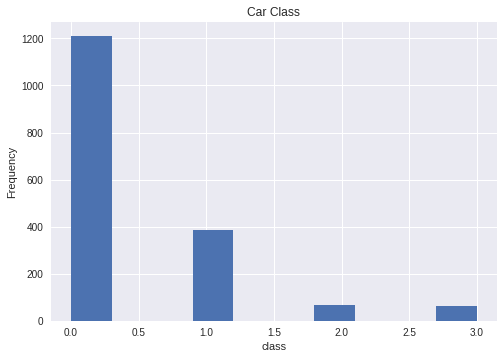

In [37]:
plt.hist(df['carClass'] )
plt.xlabel('class')
plt.ylabel('Frequency')
plt.title('Car Class')
plt.show()

From the above graph we can observe that there are more number of unccountable cars ie., if we consider 1800 cars,there are 1200 unccountable cars, 400 accountable cars, 100 good cars and 100 very good cars. This shows that most of the selling cars come under unaccountable class.

Plotting boxplot to understand the distribution of data in quartiles.

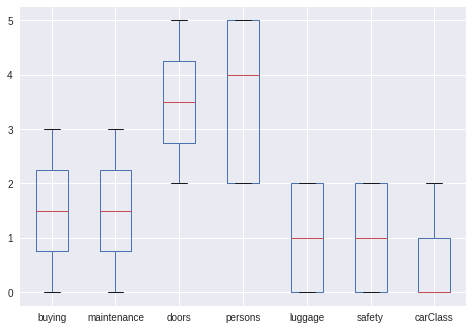

In [39]:
# Plotting boxplot
df.boxplot()

No outliers present in all the attributes.
The attributes(persons, luggage, safety) has the inter-quartile range same as the inter-whisker range.
The carClass attribute has the lower whisker same as the lower qartile.

Plotting between the attributes buying and safety using plot function

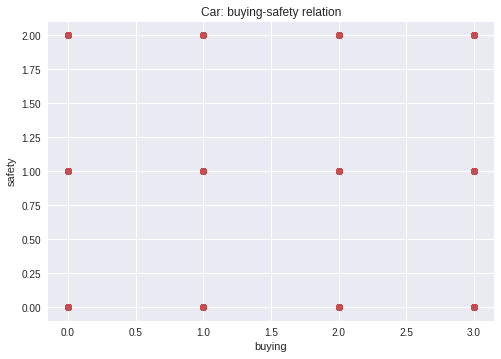

In [40]:
plt.plot(df['buying'],df['safety'],"ro")
plt.xlabel('buying')
plt.ylabel('safety')
plt.title('Car: buying-safety relation')
plt.show()

This plot shows that there are cars for every type of buying have different levels of safety.

## Pair Plot

Pair plotting between all the attributes in the data set which describes the relation among attributes.

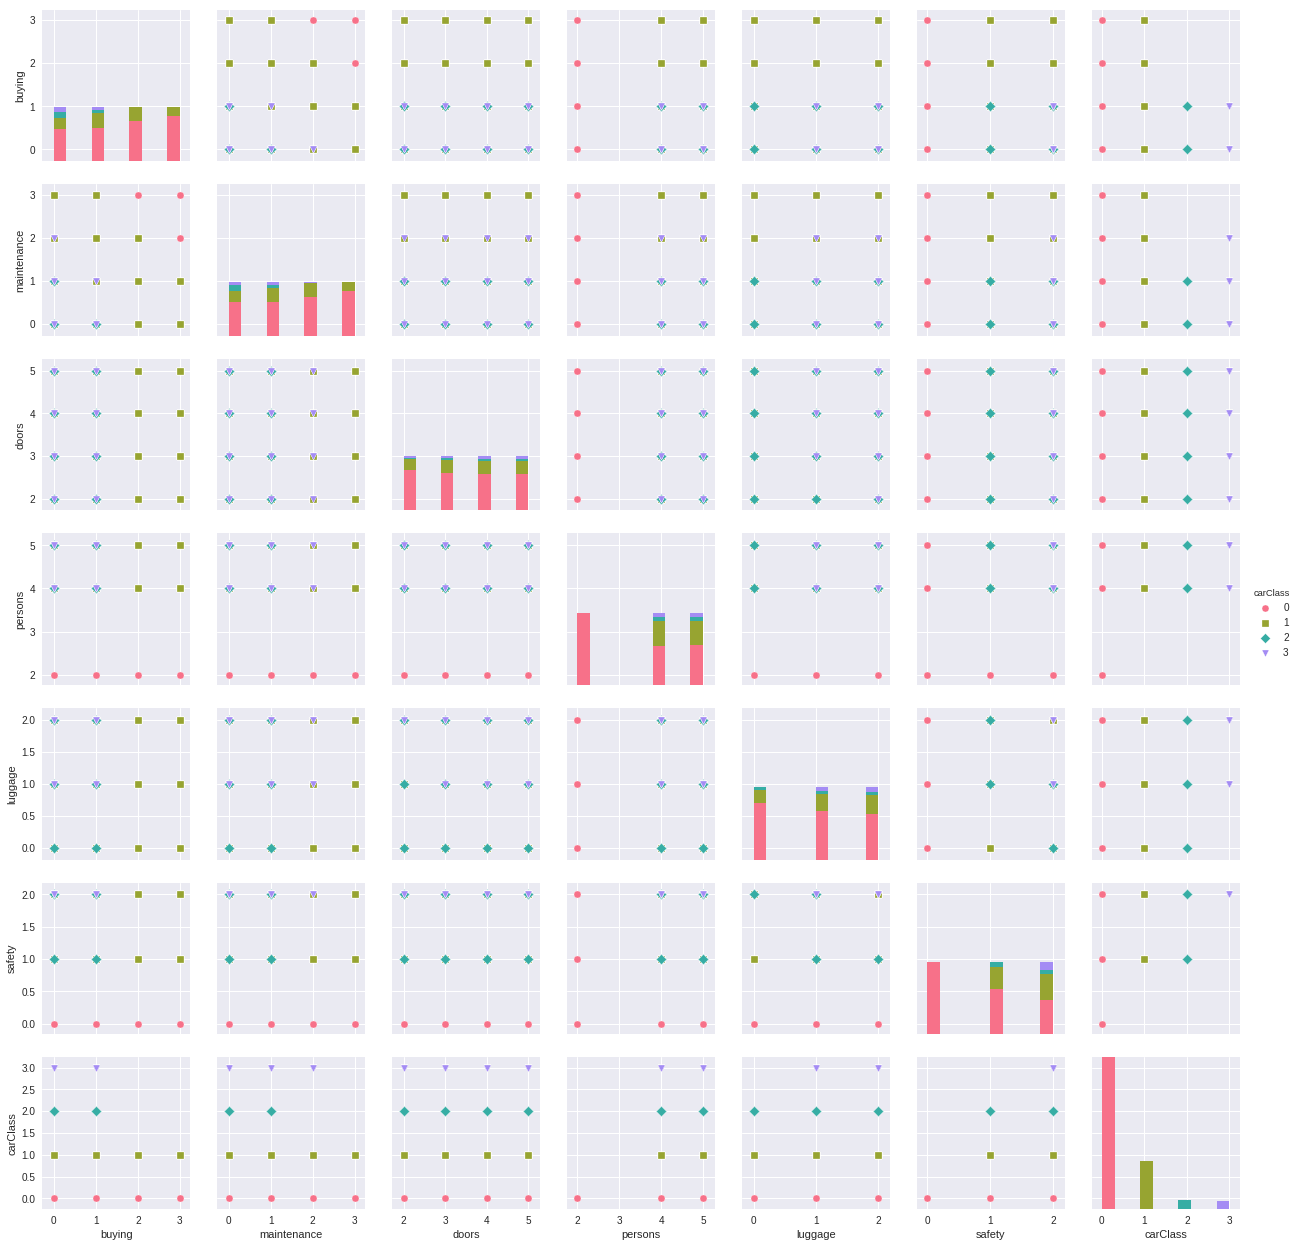

In [42]:
# pairplot method of Seaborn is used to represent the plots for each pair of attributes

sns.pairplot(df, hue='carClass',palette="husl",markers=["o", "s", "D","v"])

-> Circle describes the unaccountable cars category.<br />
-> Square describes the accountbale cars category.<br />
-> Diamond describes the good cars category.<br />
-> Cap describes the very good cars category.<br />


# Conclusion

We can observe from the above plots that the cars under very good class have high safety, optimal maintenance and atleast with medium luggage. The factor doors doesn't imply any effect in car class evaluation.